In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

plt.style.use("seaborn-v0_8")



In [2]:
# Load data
soldiers_df = pd.read_excel("../data/xviii_abn_corps_soldier_readiness.csv.xlsx")

# Filter to two groups: improving (well-managed) vs declining (High) OPTEMPO trend
group_improving = soldiers_df[soldiers_df["optempo_trend"] == "improving"]["stress_score"].dropna()

group_declining = soldiers_df[soldiers_df["optempo_trend"] == "declining"]["stress_score"].dropna()

print(f"Number_improving = {len(group_improving)}, N_declining = {len(group_declining)}")



Number_improving = 3361, N_declining = 3281


In [3]:
pd.DataFrame({
    "Group": ["Improving", "Declining"],
    "Mean Stress Score": [group_improving.mean(), group_declining.mean()],
    "Std Dev": [group_improving.std(), group_declining.std()],
    "Count": [group_improving.size, group_declining.size]
})


,Group,Mean Stress Score,Std Dev,Count
0,Improving,60.962600,15.344742,3361
1,Declining,60.551783,15.280197,3281


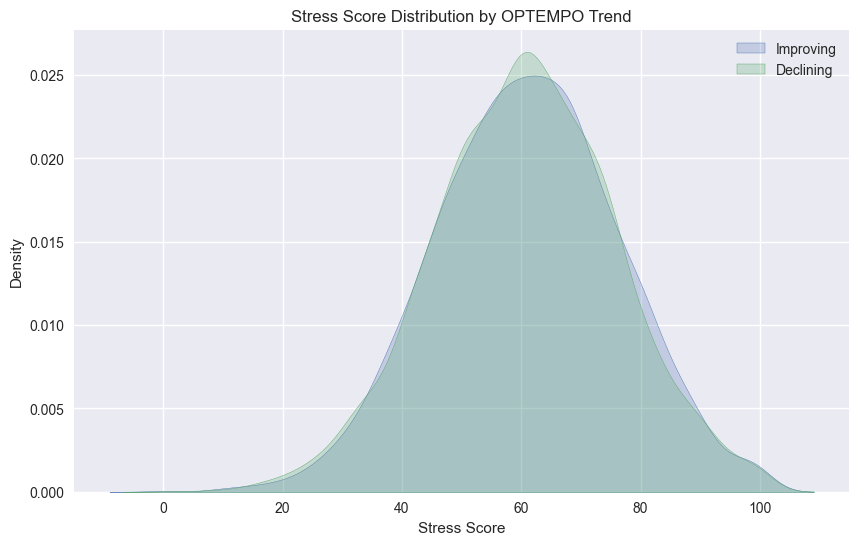

In [4]:
plt.figure(figsize=(10,6))
sns.kdeplot(group_improving, fill=True, label="Improving")
sns.kdeplot(group_declining, fill=True, label="Declining")
plt.title("Stress Score Distribution by OPTEMPO Trend")
plt.xlabel("Stress Score")
plt.legend()




Text(0.5, 1.0, 'Stress Score by OPTEMPO Trend')

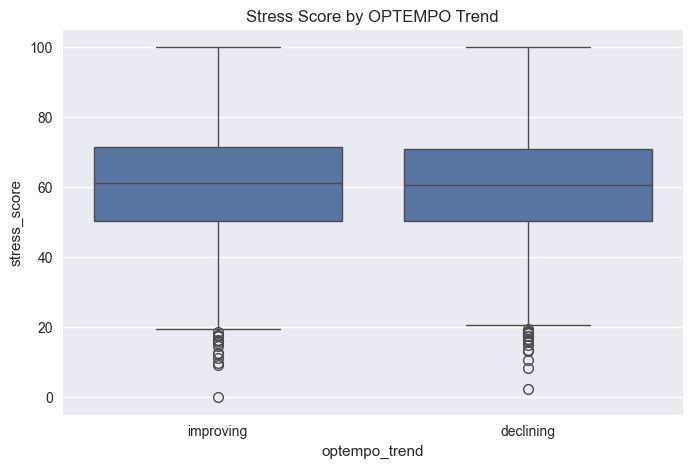

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=soldiers_df[soldiers_df["optempo_trend"].isin(["improving", "declining"])],
    x="optempo_trend",
    y="stress_score"
)
plt.title("Stress Score by OPTEMPO Trend")



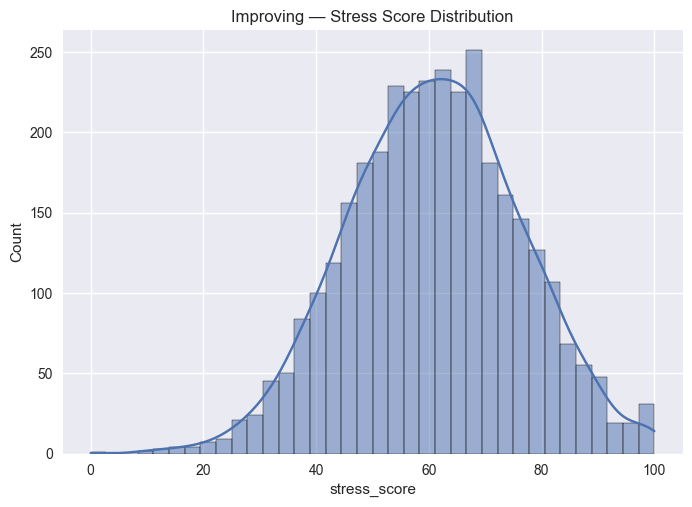

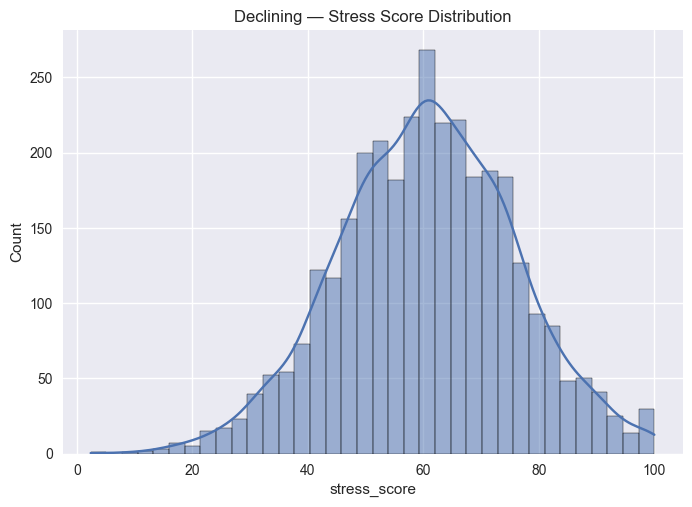

In [6]:
sns.histplot(group_improving, kde=True)
plt.title("Improving — Stress Score Distribution")
plt.show()

sns.histplot(group_declining, kde=True)
plt.title("Declining — Stress Score Distribution")
plt.show()


In [7]:
# Variance check. Varaince differ so it confirms it needs Welch's t-test

group_improving.var(), group_declining.var()


(235.46112168820306, 233.4844122163076)

In [8]:
# Welch's t-test (one-sided)
t_stat, p_two_sided = ttest_ind(
    group_declining,
    group_improving,
    equal_var=False
)

# Convert to one-sided (declining > improving)
p_one_sided = p_two_sided / 2 if t_stat > 0 else 1 - (p_two_sided / 2)

t_stat, p_one_sided


(np.float64(-1.0932050043719568), np.float64(0.8628282626753876))

In [9]:
alpha = 0.05

if p_one_sided < alpha:
    print("Reject H0: Soldiers with declining OPTEMPO have higher stress scores.")
else:
    print("Fail to reject H0: No significant evidence stress is higher for declining (high) OPTEMPO trend).")


Fail to reject H0: No significant evidence stress is higher for declining (high) OPTEMPO trend).


In [10]:
soldiers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   corps_level                     10000 non-null  object 
 1   division_level                  10000 non-null  object 
 2   brigade_level                   10000 non-null  object 
 3   mos                             10000 non-null  object 
 4   rank                            10000 non-null  object 
 5   age                             10000 non-null  int64  
 6   gender                          10000 non-null  object 
 7   acft_history_average            10000 non-null  float64
 8   current_acft_score              10000 non-null  float64
 9   acft_fitness                    10000 non-null  object 
 10  acft_failure                    10000 non-null  int64  
 11  physical_activity               10000 non-null  object 
 12  profile_status                  1